This image is:  <class 'numpy.ndarray'> with dimensions:  (558, 418, 3)


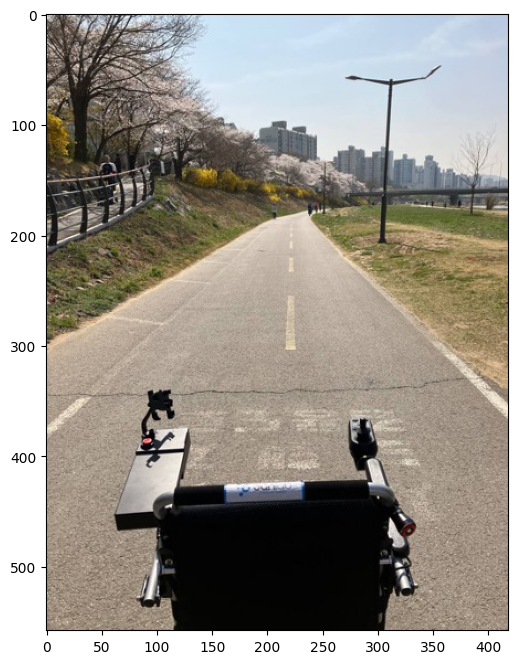

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

img = mpimg.imread("/content/drive/MyDrive/그림1.jpg")
img2 = mpimg.imread("/content/drive/MyDrive/그림2.jpg")

plt.figure(figsize=(10,8))
print("This image is: ", type(img), 'with dimensions: ', img.shape)
plt.imshow(img)
plt.show()

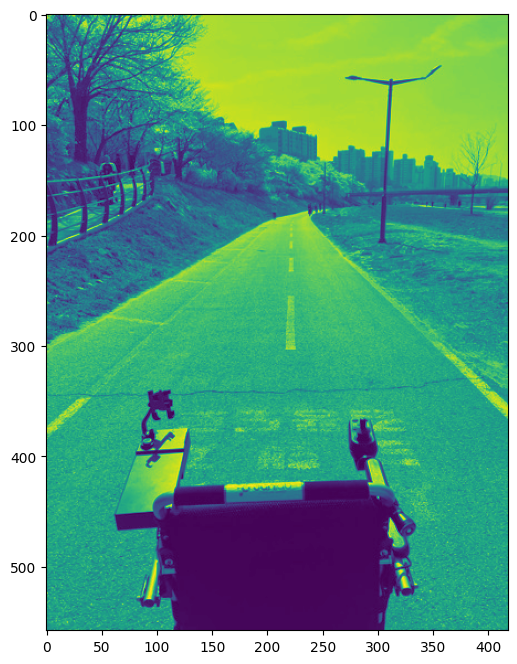

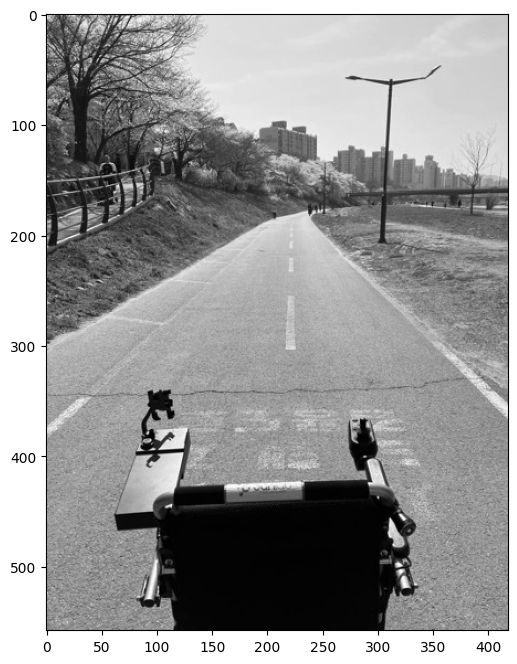

In [3]:
def grayscale(img):
  return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray = grayscale(img)
plt.figure(figsize=(10,8))
plt.imshow(gray)
plt.show()

plt.figure(figsize=(10,8))
plt.imshow(gray, cmap="gray")
plt.show()

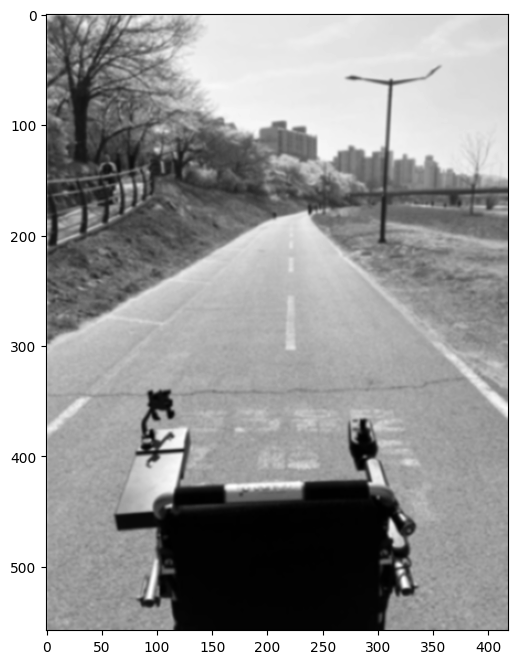

In [4]:
def gaussian_blur(img, kernel_size):
  return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

kernel_size = 5
blur_gray = gaussian_blur(gray, kernel_size)

plt.figure(figsize=(10,8))
plt.imshow(blur_gray, cmap='gray')
plt.show()

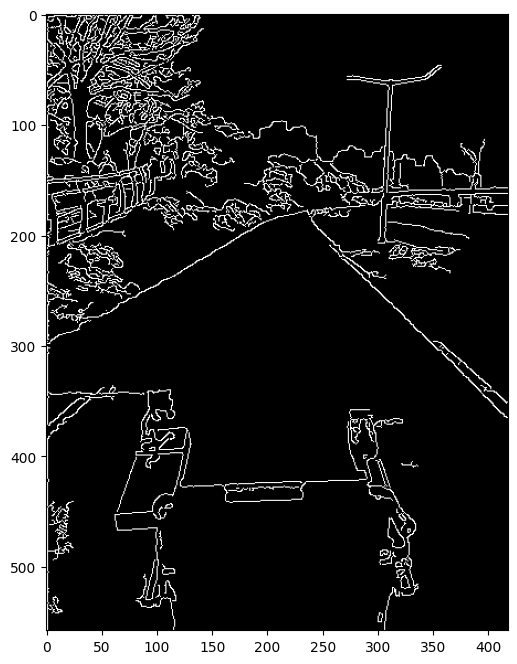

In [12]:
def canny(img, low_threshold, high_threshold):
  return cv2.Canny(img, low_threshold, high_threshold)

low_threshold = 20
high_threshold = 200
edges = canny(blur_gray, low_threshold, high_threshold)

plt.figure(figsize=(10,8))
plt.imshow(edges, cmap='gray')
plt.show()

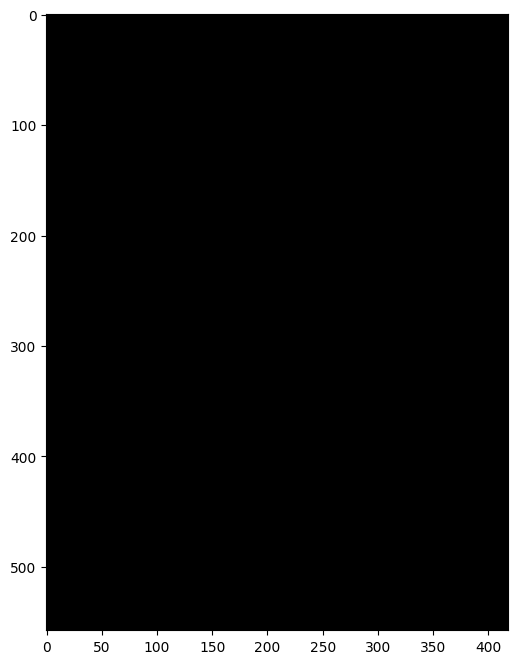

In [6]:
import numpy as np

mask = np.zeros_like(img)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap="gray")
plt.show()

(558, 418, 3)


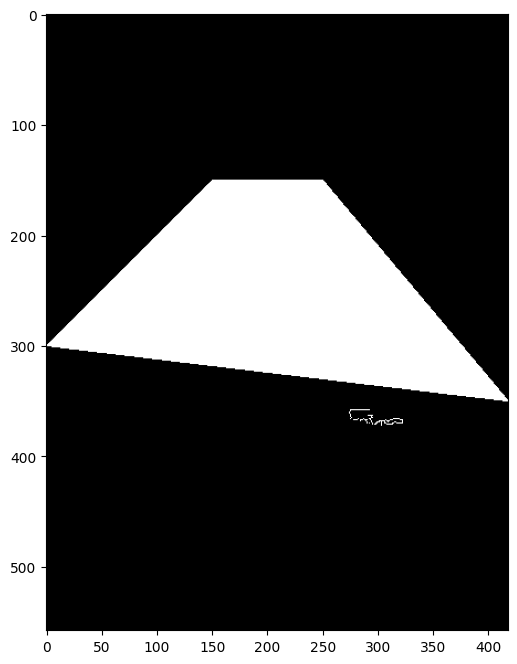

In [49]:
if len(img.shape) > 2:
  channel_count = img.shape[2]
  ignore_mask_color = (255,) * channel_count
else:
  ignore_mask_color = 255

imshape = img.shape

print(imshape)

vertices = np.array([[(0, 300),
                      (150, 150),
                      (250, 150),
                      (imshape[1], 350)]], dtype=np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

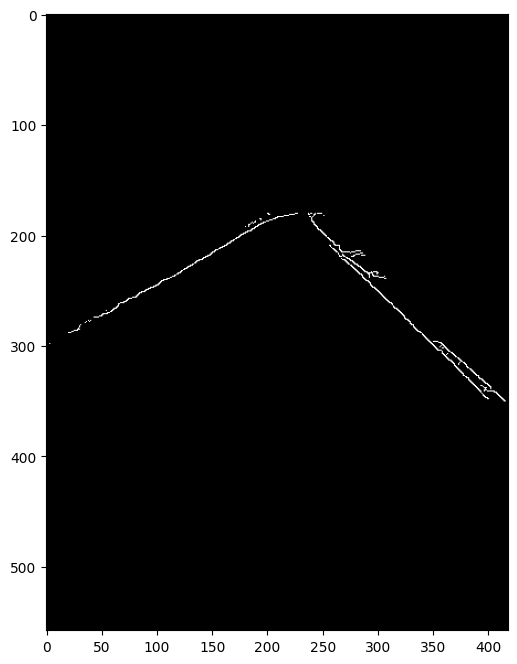

In [51]:
def region_of_interest(img, vertices):
  mask = np.zeros_like(img)

  if len(img.shape) > 2:
    channel_count = img.shape[2]
    ignore_mask_color = (255,) * channel_count
  else:
    ignore_mask_color = 255

  cv2.fillPoly(mask, vertices, ignore_mask_color)

  masked_image = cv2.bitwise_and(img, mask)

  return masked_image



imshape = img.shape
vertices = np.array([[(0, 300),
                      (200, 180),
                      (250, 180),
                      (imshape[1], 350)]], dtype=np.int32)

mask = region_of_interest(edges, vertices)

plt.figure(figsize=(10,8))
plt.imshow(mask, cmap='gray')
plt.show()

In [52]:
def draw_lines(img, lines, color=[255,0,0], thickness=5):
  for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(img, (x1,y1), (x2,y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
  lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                          minLineLength=min_line_len,
                          maxLineGap=max_line_gap)
  
  line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
  draw_lines(line_img, lines)
  return line_img

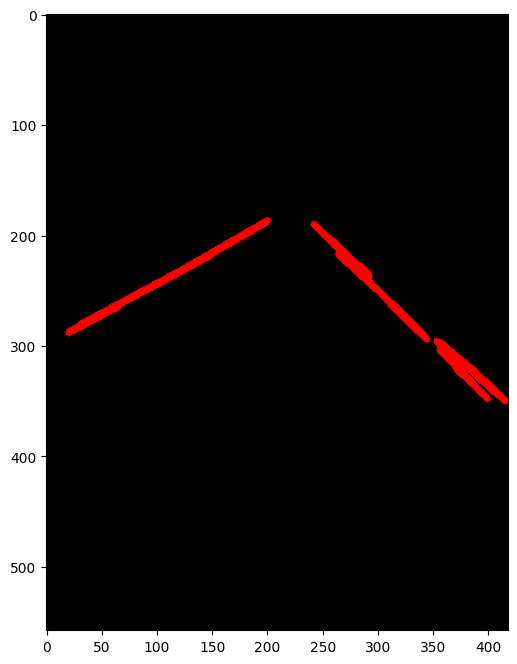

In [54]:
rho=4
theta = np.pi/180
threshold = 60
min_line_len = 5
max_line_gap = 10

lines = hough_lines(mask, rho, theta, threshold, min_line_len, max_line_gap)

plt.figure(figsize=(10,8))
plt.imshow(lines, cmap='gray')
plt.show()

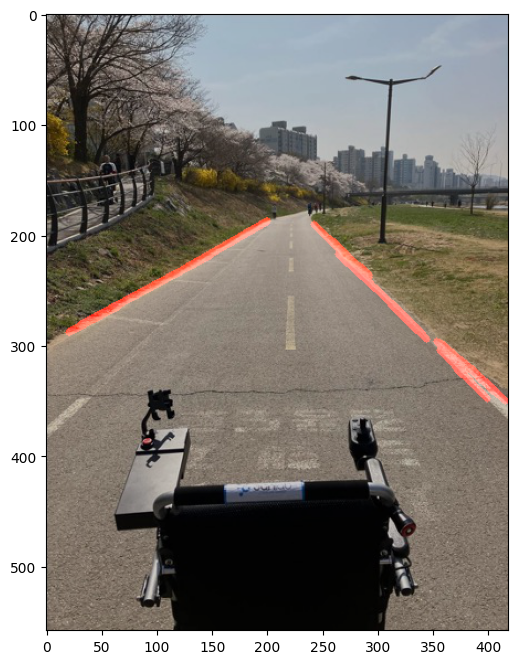

In [55]:
def weighted_img(img, initial_img, a=0.8, b=1., l=0.):
  return cv2.addWeighted(initial_img, a, img, b, l)

lines_edges = weighted_img(lines, img, a=0.8, b=1., l=0.)

plt.figure(figsize=(10,8))
plt.imshow(lines_edges)
plt.show()